# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
previsao_raw = pd.read_csv('previsao_de_renda.csv')

In [4]:
previsao_raw

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


### Análise das rendas médias
Verificando as médias de renda para quem possui ou não veículo e para quem possui ou não um imóvel, observamos que a média de renda aumenta para quem possui um desses bens.

In [5]:
previsao_veiculo = previsao_raw[['renda', 'posse_de_veiculo']].copy()

In [6]:
previsao_veiculo.groupby('posse_de_veiculo').aggregate(['min', 'mean', 'max'])

renda                       
                     min         mean       max
posse_de_veiculo                               
False             159.90  4390.506963  89918.04
True              187.69  4992.579609  67794.54

In [7]:
previsao_imovel = previsao_raw[['renda', 'posse_de_imovel']].copy()

In [8]:
previsao_imovel.groupby('posse_de_imovel').aggregate(['min', 'mean', 'max'])

renda                       
                    min         mean       max
posse_de_imovel                               
False            260.68  4426.970482  67794.54
True             159.90  4721.052704  89918.04

### Análise de distribuição
Nos gráficos de distribuição, a quantidade de pessoas que não possuem carro supera as que possuem e, situação inversa observa-se na distribuição das pessoas que tem imóvel superam as que não possuem. Por esse parâmetro não dá para estabelecer uma relação direta entre as citadas variáveis e o valor da renda.

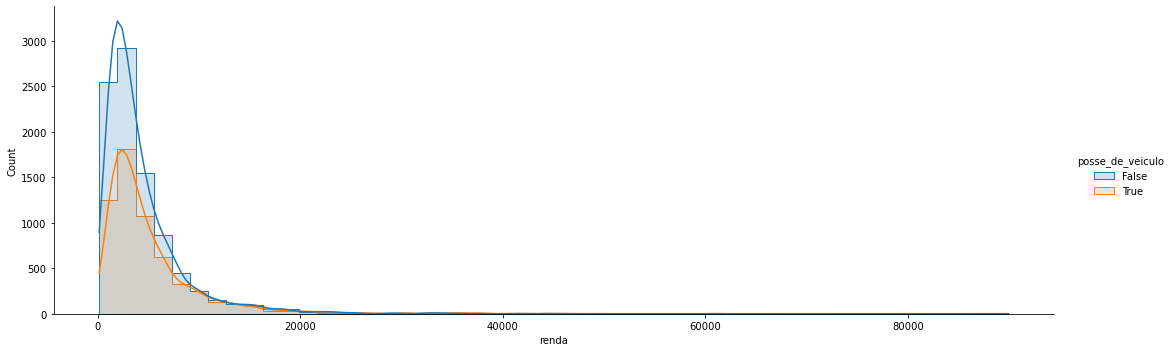

In [9]:
sns.displot(data = previsao_veiculo 
            ,alpha = .20
            ,x = 'renda'
            ,hue = 'posse_de_veiculo'
            ,bins = 50
            ,element = 'step'
            ,kde = True
            ,height=5
            ,aspect=3
           )

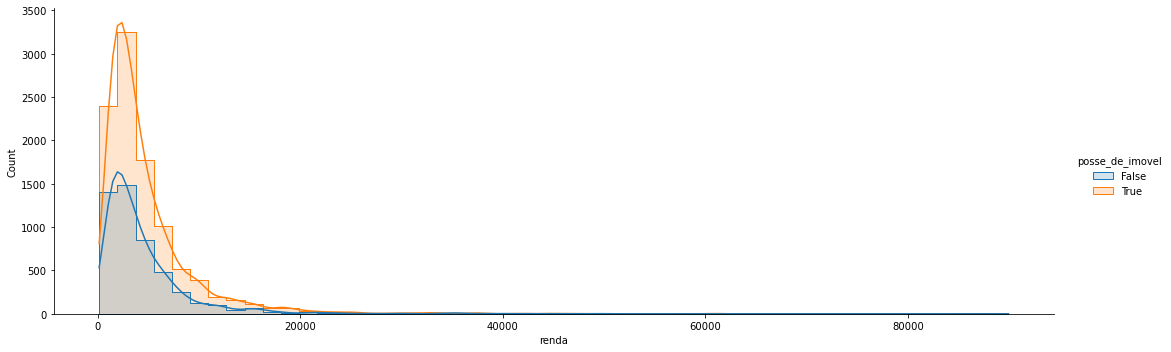

In [12]:
sns.displot(data = previsao_imovel 
            ,alpha = .20
            ,x = 'renda'
            ,hue = 'posse_de_imovel'
            ,bins = 50
            ,element = 'step'
            ,kde = True
            ,height=5
            ,aspect=3
           )

### Análise gráfico de confiabilidade

Gerando os gráfico de confiabilidade observamos uma variabilidade ligeiramente menor na variável 'posse_de_imovel', indicando possivelmente ser a variável mais indicada para determinar renda. Consequentemente, na distribuição a quantidade de pessoas que possuem os dois bens é bem menor do que os que possuem só um ou outro.

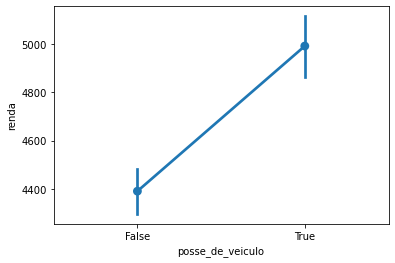

In [10]:
ax = sns.pointplot(x="posse_de_veiculo", y="renda",
                   data=previsao_veiculo, dodge=True, ci = 95)

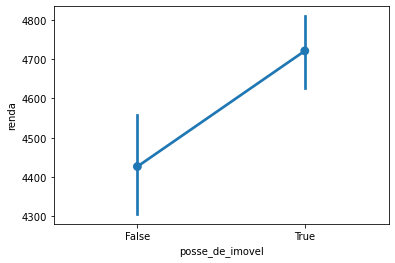

In [13]:
ax = sns.pointplot(x="posse_de_imovel", y="renda",
                   data=previsao_imovel, dodge=True, ci = 95)

### Renda baseada na posse dos dois bens

Agora, ao observar a renda dos que possuem a posse os dois bens percebe-se uma variação mais nítida entre a média de renda dos que possuem apenas um dos bens e dos que possuem os dois bens.

In [10]:
previsao_ambos = previsao_raw[['renda', 'posse_de_veiculo', 'posse_de_imovel']].copy()

In [11]:
previsao_ambos

,renda,posse_de_veiculo,posse_de_imovel
0,3369.24,False,True
1,6096.14,True,True
2,5658.98,True,True
3,7246.69,True,False
4,4017.37,False,False
...,...,...,...
14995,1193.29,True,True
14996,2519.18,True,True
14997,1586.85,True,True
14998,6975.39,False,True


In [23]:
previsao_ambos['posse_ambos'] = np.where((previsao_ambos['posse_de_veiculo'] == True) & (previsao_ambos['posse_de_imovel'] == True)
                                         , 'dual', 'uno')

In [24]:
previsao_ambos.head()

,renda,posse_de_veiculo,posse_de_imovel,posse_ambos
0,3369.24,False,True,uno
1,6096.14,True,True,dual
2,5658.98,True,True,dual
3,7246.69,True,False,uno
4,4017.37,False,False,uno


In [39]:
previsao_ambos.groupby('posse_ambos').aggregate({'renda': ['min', 'mean', 'max']})

renda                       
                min         mean       max
posse_ambos                               
dual         187.69  5057.200615  45519.82
uno          159.90  4474.225320  89918.04

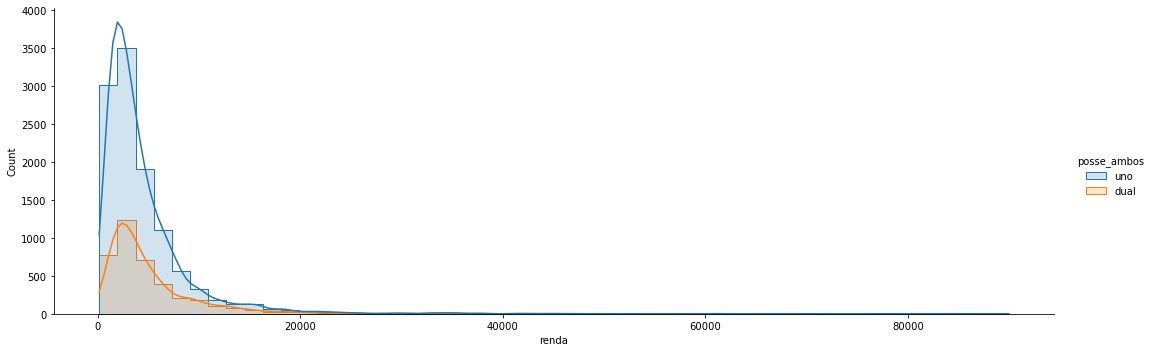

In [40]:
sns.displot(data = previsao_ambos 
            ,alpha = .20
            ,x = 'renda'
            ,hue = 'posse_ambos'
            ,bins = 50
            ,element = 'step'
            ,kde = True
            ,height=5
            ,aspect=3
           )

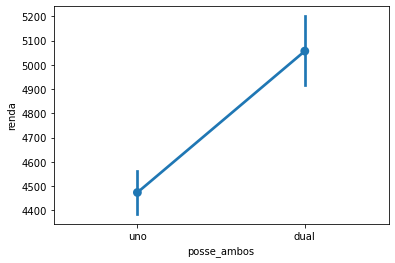

In [41]:
ax = sns.pointplot(x="posse_ambos", y="renda",
                   data=previsao_ambos, dodge=True, ci = 95)